# Vertrauensintervall

Bei der Bestimmung des Verwerfungsbereiches beim $z$-Test, gehen wir vom einem wahren (aber unbekannten) Wert $\mu$ aus und einer bekannten Standardabweichung aus. Dann bestimmen wird das Quartil $q_{0.025}$ und $q_{0.975}$ bei einem zweiseitigen Test und Signifikanzniveau $\alpha=0.05$. 

Wir gehen von einer Normalverteilungskurve $X\sim\mathcal{N}(5,2^2)$ aus. Dann sind die  $q_{0.025}$- und $q_{0.975}$-Quantile 

In [91]:
norm.ppf(q=[0.025,0.975], loc=6 , scale=2)

array([1.08007203, 8.91992797])

Unten ist die Normalverteilungskurve mit dem Verwerfungsbereich rot eingezeichnet.

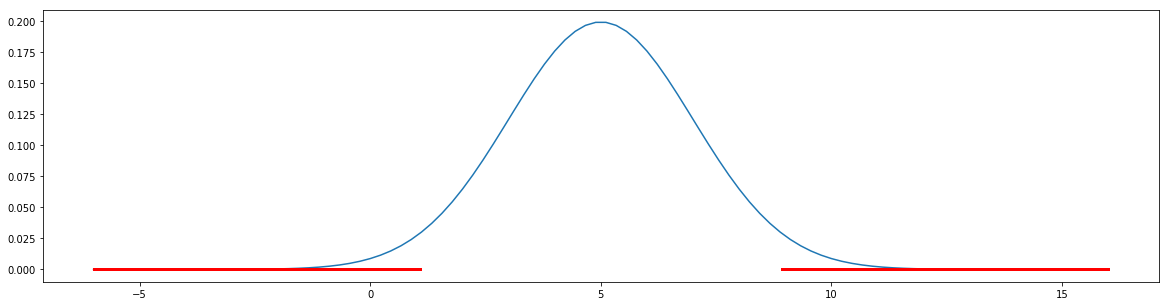

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.rcParams["figure.figsize"] = (20,5)

# Bereich der x-Achse
aw = -6
ew = 16

# Berechnung der Funktionswerte
mean = 5
sd = 2
x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Bestimmung der Quantile
q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)

# Plot des Verwerfungsbereiches
plt.plot([aw, q_025], [0, 0], color="red", linewidth=3)
plt.plot([q_975, ew], [0, 0], color="red", linewidth=3)

Liegt nun $\overline{x}_n$ im Verwerfungsbereich (roter Bereich), dann wird die Nullhypothese $H_0$ verworfen. 


Nun ist das wahre $\mu$ praktisch immer unbekannt und für die Bestimmung der Verwerfungsbereiches wurde ein Wert einfach angenommen. Wir können die Frage auch einfach umkehren: Wir kennen $\overline{x}_n$ und fragen uns, für welche $\mu$ wird $H_0$ _nicht_ verworfen.

Dies kann man rechnerisch herleiten, wir machen es hier aber graphisch. Wir gehen zur Veranschaulichung wieder von der Annahme $\mu=5$ aus.

Wir haben nun $\overline{x}_n=6$ gegeben und zeichnen den Verwerfungsbereich ein. In der Skizze unten sind:

- Die dicken roten Linien entsprechen dem Verwerfungsbereich für $\mu=\overline{x}_n=6$. 
- Die dünnen roten Linien entsprechen dem Verwerfungsbereich für $\mu_0=5$.
- Der vertikale schwarze Strich entspricht dem $\mu=\overline{x}_n=6$
- Der vertikale blaue Strich entspricht dem $\mu_0=5$

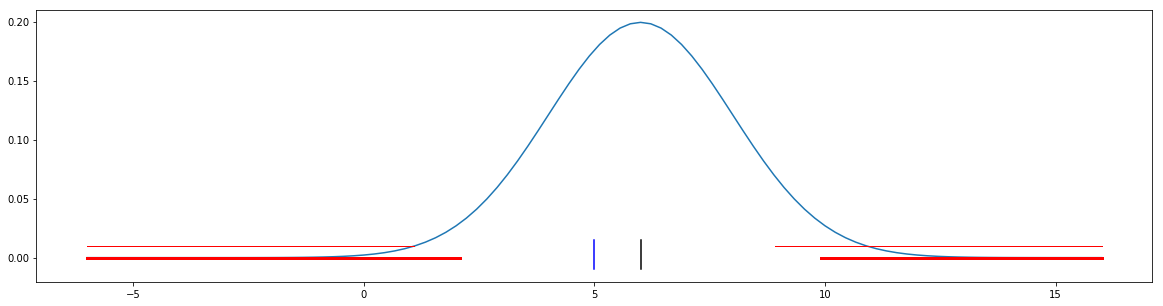

In [2]:
# Berechnung der Funktionswerte
mean = 6

x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Bestimmung der Quantile
q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)

# Plot des Verwerfungsbereiches
plt.plot([aw, q_025], [0, 0], color="red", linewidth=3)
plt.plot([q_975, ew], [0, 0], color="red", linewidth=3)

plt.plot([mean, mean], [-.01, .015], color="black")
plt.plot([5, 5], [-.01, .015], color="blue")

# Plot des Verwerfungsbereiches
q_025_n, q_975_n = norm.ppf(q=[0.025,0.975], loc=5 , scale=2)
plt.plot([aw, q_025_n], [0.01, 0.01], color="red", linewidth=1)
plt.plot([q_975_n, ew], [0.01, 0.01], color="red", linewidth=1)

Wir stellen fest, dass beide Werte $\mu$ und $\mu_0$ nicht innerhalb in einem der beiden Verwerfungsbereiche liegen. Die Idee ist nun, dass wir $\mu$ vergrössern und $\mu_0=5$ konstant lassen. Dazu definieren wir folgende Funktion vb(), wo jeweils $\mu$ übergeben wird:

In [4]:
def vb(mean):
    x = np.linspace(start=aw, stop=ew, num=100)
    y = norm.pdf(x, loc=mean, scale=sd)
    plt.plot(x,y)
    #Bestimmung der Quantile
    q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)
    
    # Plot der Verwerfungsbereiches für mu=6
    plt.plot([aw, q_025], [0, 0], color="red", linewidth=3)
    plt.plot([q_975, ew], [0, 0], color="red", linewidth=3)
 
    # Plot der Verwerfungsbereiches für mu=5
    q_025_n, q_975_n = norm.ppf(q=[0.025,0.975], loc=5 , scale=2)
    plt.plot([aw, q_025_n], [0.01, 0.01], color="red", linewidth=1)
    plt.plot([q_975_n, ew], [0.01, 0.01], color="red", linewidth=1)
    
    plt.plot([mean, mean], [-.01, .015], color="black")
    plt.plot([5, 5], [-.01, .015], color="blue")
    

Wir wählen nun $\mu=7$, dann $\mu=8$ und $\mu=9.5$.

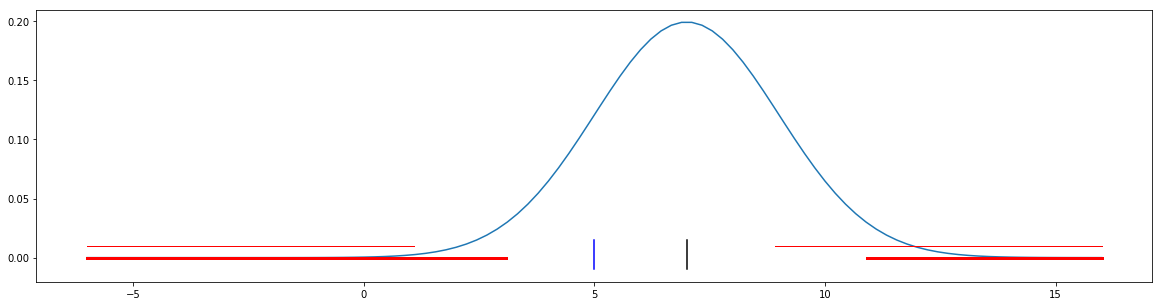

In [5]:
vb(7)

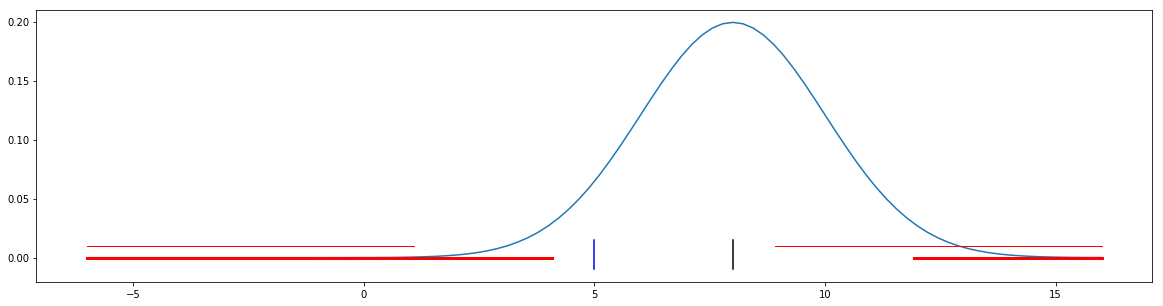

In [6]:
vb(8)

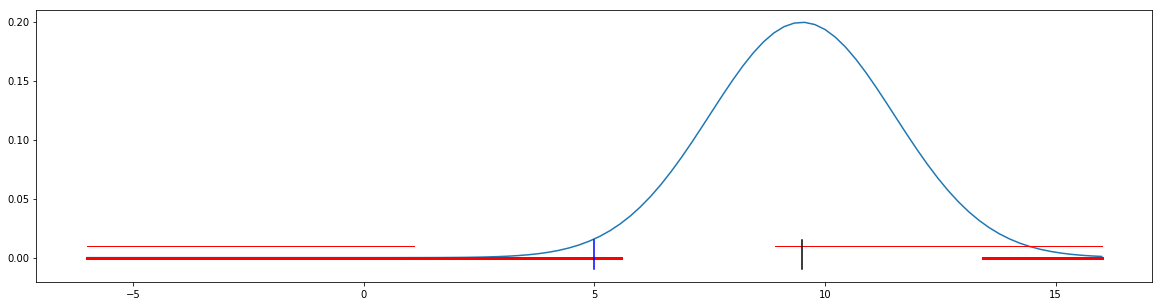

In [7]:
vb(9.5)

Für $\mu=7$ und $\mu=8$ ist die Situation ähnlich wie bei $\mu=7$, dass beide Werte $\mu$ und $\mu_0$ nicht innerhalb in einem der beiden Verwerfungsbereiche liegen, also $H_0$ für $\mu_0=5$ _nicht_ verworfen wird.

Die Situation ändert sich für $\mu=9.5$, da liegt dieser Wert (schwarze Linie) im Verwerfungsbereich von $\mu_0=5$ (dünne rote Linien), also wird die Nullhypothese $H_0$ nun verworfen. Auf der anderen Seite liegt nun aber $\mu_0=5$ im Verwerfungsbereich für $\mu=9.5$. 

Wir wollen dies noch anders darstellen. Wir nehmen nicht der Verwerfungsbereich, sondern das was _nicht_ zum Verwerfungsbereich gehört. Der ist unten grün eingezeichnet. 

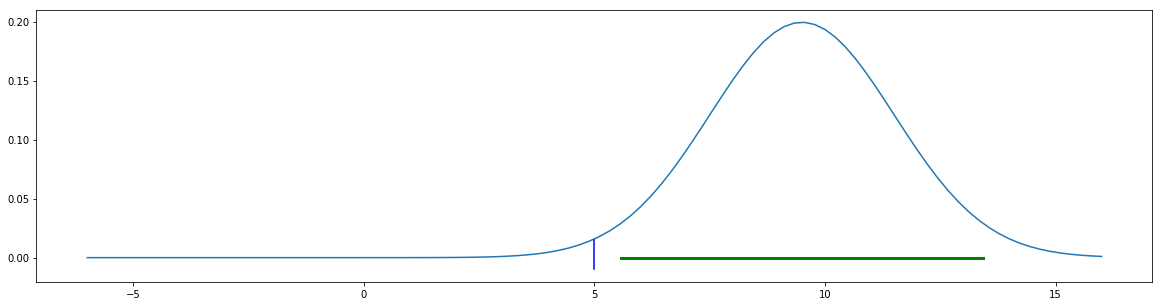

In [8]:
# Berechnung der Funktionswerte
mean = 9.5

x = np.linspace(start=aw, stop=ew, num=100)
y = norm.pdf(x, loc=mean, scale=sd)

plt.plot(x,y)

#Bestimmung der Quantile
q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)

# Plot der Vertrauensintervall 
plt.plot([q_025, q_975], [0, 0], color="green", linewidth=3)

plt.plot([5, 5], [-.01, .015], color="blue")

Der Wert 5 liegt nicht im Vertrauensintervall:

In [84]:
print("Vertrauensintervall", q_025,q_975)

Vertrauensintervall 5.580072030919891 13.419927969080108


Wir haben oben gesehen, dass die Nullhypothese dann verworfen wird. Fällt das wahre $\mu$ also aus dem Vertrauensintervall, dann wird die Nullhypothese verworfen. 

Dies führt uns zu einer weiteren Interpretation des Vertrauensintervalls. Dieses enthält alle $\mu$'s für die Nullhypothese _nicht_ verworfen wird. Es sagt uns also in welchem Intervall sich das wahre $\mu$ befindet. Und wie immer gilt dies nicht absolut, sondern mit einer bestimmten Wahrscheinlichkeit. In diesen Fall liegt das wahre $\mu$ zu 95% im Vertrauensintervall. Wir sprechen deswegen auch von einem 95%-Vertrauensintervall. 

Somit haben wir einen weitere Möglichkeit für einen Testentscheid:
- Liegt $\mu_0$ der Nullhypothese im Vertrauensintervall, so wird die Nullhypothese _nicht_ verworfen. 
- Liegt $\mu_0$ der Nullhypothese _nicht_ im Vertrauensintervall, so wird die Nullhypothese  verworfen.

Hier noch die Funktion vi():

In [9]:
def vi(mean):
    # Berechnung der Funktionswerte
    x = np.linspace(start=aw, stop=ew, num=100)
    y = norm.pdf(x, loc=mean, scale=sd)

    plt.plot(x,y)

    #Bestimmung der Quantile
    q_025, q_975 = norm.ppf(q=[0.025,0.975], loc=mean , scale=sd)
    print("Vertrauensintervall", q_025,q_975)
    
    # Plot der Vertrauensintervall 
    plt.plot([q_025, q_975], [0, 0], color="green", linewidth=3)

    plt.plot([5, 5], [-.01, .015], color="blue")

Vertrauensintervall 2.080072030919891 9.919927969080108


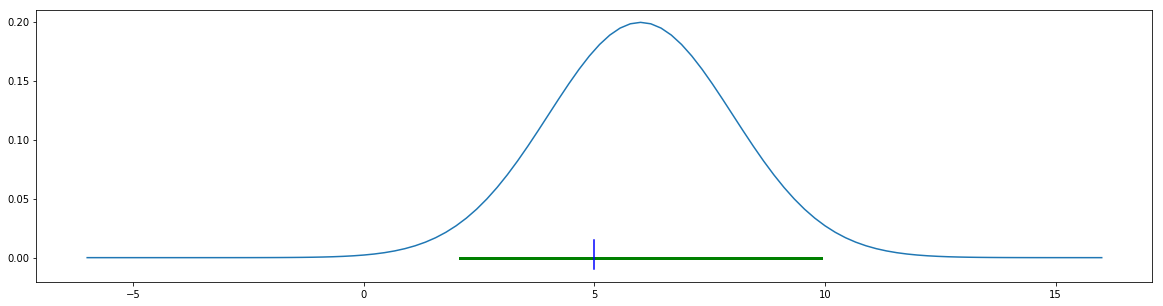

In [10]:
vi(6)

Vertrauensintervall -3.919927969080109 3.919927969080108


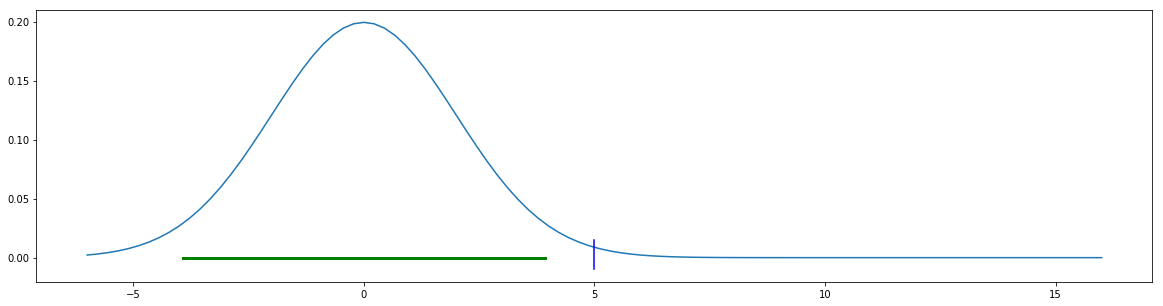

In [11]:
vi(0)

Wir können das Vertrauensintervall auch wie folgt bestimmen:

In [106]:
norm.interval(alpha=0.95, loc=0, scale=2)

(-3.919927969080108, 3.919927969080108)

## Simulation

Wir wählen nun zufällig einen Wert aus $\mathcal{N}(5, 2^2)$ aus und schauen ob dieser Wert im Vertrauensintervall liegt.

In [153]:
np.random.seed(1)
x = norm.rvs(size=1, loc=5, scale=2)
norm.interval(alpha=0.95, loc=x, scale=2)

(array([4.32876276]), array([12.1686187]))

Der Wert liegt im Vertrauensintervall. Aber ist dies immer der Fall?

In [167]:
np.random.seed(106)
x = norm.rvs(size=1, loc=5, scale=2)
norm.interval(alpha=0.95, loc=x, scale=2)

(array([5.40994191]), array([13.24979784]))

In diesem Fall liegt 5 nicht im Vertrauensintervall. Die Frage ist, wieviele Male dies der Fall ist. Dazu simulieren wir 1000 zufällige Werte aus $\mathcal{N}(5, 2^2)$ und berechnen deren Vertrauensintervall und schauen, ob dieser Wert im Vertrauensintervall liegt oder nicht. 

In [308]:
n = 1000
x = norm.rvs(loc=5, scale=2, size=n)
y = norm.interval(alpha=0.95, loc=x, scale=2)

yu = y[0]
yo = y[1]
k = 0
for i in range(n-1): 
   if (yu[i] <= 5 <= yo[i]) == False:
        k = k + 1
        
print(k)

46


Jedesmal, wenn wir obigen Code ausführen erscheint eine andere Zahl, aber alle sind um die 50 oder 5% von 1000. Oder wir können 100 gleichzeitig ausgeben: 

In [323]:
def vi2(n):
    x = norm.rvs(loc=5, scale=2, size=n)
    y = norm.interval(alpha=0.95, loc=x, scale=2)

    yu = y[0]
    yo = y[1]
    k = 0
    for i in range(n-1): 
       if (yu[i] <= 5 <= yo[i]) == False:
            k = k + 1
        
    print(k, end=" ")
    
for i in range(100):
    vi2(1000)

43 49 48 60 56 41 50 60 60 42 45 47 47 50 39 47 70 57 53 49 57 47 46 57 61 58 44 42 37 53 52 39 47 52 51 50 48 54 47 45 48 61 49 54 40 50 53 47 54 55 47 53 52 46 54 50 48 43 55 40 61 47 58 35 52 50 65 44 47 60 50 52 53 47 48 48 54 47 48 62 50 55 40 41 37 41 44 51 44 44 49 62 62 48 47 50 63 44 53 51 

Wir können dies auch noch graphisch machen, aber nur 100 ausgewählten Werten und deren zugehörigen Vertrauensintervallen. Alle schwarzen Intervall enthalten den Wert 5 _nicht_.

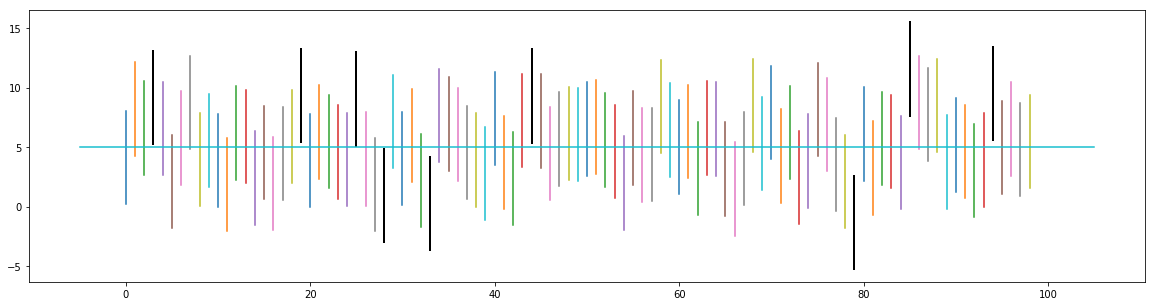

In [12]:
x = norm.rvs(loc=5, scale=2, size=100)
y = norm.interval(alpha=0.95, loc=x, scale=2)

yu = y[0]
yo = y[1]

for i in range(99): 
   plt.plot([i,i],[yu[i],yo[i]])
   if (yu[i] <= 5 <= yo[i]) ==False:
        plt.plot([i,i],[yu[i],yo[i]],c="black",linewidth=2)
        
plt.plot([-5,105],[5,5])

Auch hier ändern sich bei jedem Durchgang (wegen der Zufälligkeit) die Anzahl der schwarzen Striche, aber es immer um die 5 herum, also 5% von 100.